# 2.5 &ndash; Problem-4.13

---

## 2.5.0 &ndash; Learning Objectives

By the end of this section you should be able to:

1. Understand the Product, effluent and waste streams.
2. Plot a logarithmic plot
3. Convert a logarithmic plot into a linear plot.
4. Roughly asses a plot and its strengths and shortcomings

---

## 2.5.1 &ndash; Problem statement

A pharmaceutical product, P, is made in a batch reactor. The reactor effluent goes through a purification process to yield a final product stream and a waste stream. The initial charge (feed) to the reactor and the final product are each weighed, and the reactor effluent, final product, and waste stream are each analyzed for P.

The analyzer calibration is a series of meter readings, corresponding
to known mass fractions of P.

| xp | 0.08 | 0.16 | 0.25 | 0.45 |
|----|------|------|------|------|
| R  | 105  | 160  | 245  | 300  |

a) Plot the analyzer calibration data on logarithmic axes and determine an expression for ( ).

The data sheet for one run is shown below:

Batch : 23601 Date: 10/4

Mass charged to reactor: 2253 kg

Mass of purified product: 1239 kg

Reactor effluent analysis: R= 388

Final product analysis: R= 583

Waste stream analysis: R= 140

b) Calculate the mass fractions of P in all three streams. Then calculate the percentage yield of the purification process,

$$ \frac {kg \space P \space in \space final \space product}{kg \space P  \space in \space reactor\space effluent} *100 $$

c) You are the engineer in charge of the process. You review the given run sheet and the calculations of part (b), perform additional balance calculations, and realize that all of the recorded run data cannot possibly be correct. State how you know, itemize possible causes of the problem, state
which cause is most likely, and suggest a step to correct it

---

## 2.5.2 &ndash; Answer

Part a)
slope:1.3645457425169747,y-intercept:-8.839384358742024


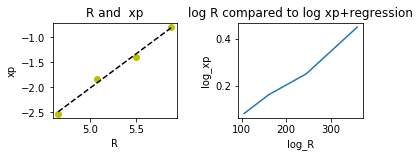

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

xp = np.array([0.08,0.16,0.25,0.45])
R = np.array([105,160,245,360])
log_xp= np.log(xp)
log_R = np.log(R)

fit = np.polyfit(log_R,log_xp,1)
fit_function = np.poly1d(fit) 
# fit_function is a function which takes in x and returns an estimate for y

print("Part a)")
fig=plt.figure()
fig1 = fig.add_subplot(221)
plt.xlabel('R')
plt.ylabel('xp')
plt.title('R and  xp')
fig2 = fig.add_subplot(222)
# fig1.plt.plot(log_R,log_xp, 'yo', log_R, fit_function(log_R), '--k')
fig1.plot(log_R,log_xp, 'yo', log_R, fit_function(log_R), '--k')
plt.xlabel('log_R')
plt.ylabel('log_xp')
plt.title('log R compared to log xp+regression')

fig2.plot(R,xp)
print("slope:{},y-intercept:{}".format(fit[0],fit[1]))



plt.tight_layout(pad=2, w_pad=2, h_pad=1.0)

This is the logarithmic plot:

$$ \log{xp} = 1.36\log{R} -8.839  $$ 

We want to __linearize__ this logarithmic plot better correlates the data.
Taking the exponent of this function to get an expression of x: 

$$ xp = e^{-8.839}*R^{1.36} $$

In [10]:
print ( "Part b:")
print ("Using the derived power function from part a we will fit \neach of R values from their respective streams.\n\n")

# Remember that fit[] is an array that stores the slope and the y intercept 
eff = np.exp(fit[1])*388**fit[0]
final =np.exp(fit[1])*583**fit[0]
waste =np.exp(fit[1])*140**fit[0]

print ("The mass fractions for the individual streams are: \nEffluent: {} \nFinal product: {} \nWaste stream: {}".format(eff,final,waste))
mass_of_P_effluent = 2253 * eff
mass_of_P_product = 1239 *final
P_yield = mass_of_P_product/mass_of_P_effluent*100

print("The yield is: {} percent".format(P_yield))


Part b:
Using the derived power function from part a we will fit 
each of R values from their respective streams.


The mass fractions for the individual streams are: 
Effluent: 0.4939505334927248 
Final product: 0.860964810355995 
Waste stream: 0.12291192587049399
The yield is: 95.8544008692822 percent


In [11]:
print("part C:")
mass_of_P_waste = waste *(2253-1239)
mass_of_waste = 2253-1239

print( "Mass of waste: {}\nMass of P: {}".format(mass_of_waste, mass_of_P_waste))


part C:
Mass of waste: 1014
Mass of P: 124.6326928326809


The mass of P in the product stream plus the waste stream should equal to the mass of P in the effluent stream. Let us check if that is true:

In [23]:
mass_of_P_effluent == mass_of_P_product+mass_of_P_waste


False

Uh oh

In [12]:
print("Mass of P in the effluent is: {}\nand the mass of the combined stream is: {}".format(mass_of_P_effluent,mass_of_P_waste+mass_of_P_product))

Mass of P in the effluent is: 1112.870551959109
and the mass of the combined stream is: 1191.3680928637589




Errors include:
 - few data points 
 - inaccurate R readings 
 - inaccurate xp readings 
 - inaccurate weight readings
 - __poor fit of regression__
 - inaccurate model (what if the function is not a power fit)
 
 The error of the mass balance is relatively small. This error is due most likely to the fitted curve from which the R value is interpolated on. The __ideal__ solution is to perform more analyses with more data points.